In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [2]:
cause_death = pd.read_csv('cause_of_deaths.csv')
cause_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [3]:
cause_death.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [4]:
len(cause_death['Country/Territory'].unique())

204

In [5]:
#can we group by continent first? 
countries_continents = pd.read_csv('countries_continents.csv')

del countries_continents['Unnamed: 0']
countries_continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay
193,South America,Venezuela


In [6]:
#merge the two df

cause_death = pd.merge(cause_death, countries_continents, how = 'left', left_on=['Country/Territory'], right_on=['Country'])
cause_death

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent,Country
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,338,2054,4154,5945,2673,5005,323,2985,Asia,Afghanistan
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,351,2119,4472,6050,2728,5120,332,3092,Asia,Afghanistan
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,386,2404,5106,6223,2830,5335,360,3325,Asia,Afghanistan
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,425,2797,5681,6445,2943,5568,396,3601,Asia,Afghanistan
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,451,3038,6001,6664,3027,5739,420,3816,Asia,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,381,2990,2373,2751,1956,4202,632,146,Africa,Zimbabwe
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,393,3027,2436,2788,1962,4264,648,146,Africa,Zimbabwe
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,398,2962,2473,2818,2007,4342,654,144,Africa,Zimbabwe
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,400,2890,2509,2849,2030,4377,657,139,Africa,Zimbabwe


In [7]:
columns = cause_death.columns.tolist()
del columns[-4:]
del columns[:3]

#How many countries does each continent have in this dataset?
continent_year = cause_death[cause_death['Year'] == 1990].groupby('Continent').count()
continent_year

#just to get all the continents to loop through
continents = cause_death.groupby('Continent').sum()
continents



,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3006750,4980403,1514433,391320,4704399,17235839,821063,2006328,2588974,26549815,...,3847509,3309946,551328,4548564,5388829,5066133,5827590,9002705,730343,629656
Asia,2345265,4219232,12869210,3415678,6282625,3336930,7367483,3923023,4249165,4163590,...,15290597,15302278,1283382,4857847,20753709,76005521,19346226,33392304,1721179,2998457
Europe,2585805,115177,7067430,1571656,192892,49,497809,527724,22260,456298,...,3438743,2843738,195245,157499,2176053,8281401,4293476,8615206,337578,17765
North America,1322970,111163,1027848,239139,474983,30640,207746,1147032,138572,634961,...,2080049,1827102,39028,428027,1032116,1653501,1539711,2565897,79130,14186
Oceania,841890,26144,263324,62592,13427,42055,24460,30115,23714,73171,...,257971,141076,5714,12308,130193,493210,80094,217073,22685,3925
South America,721620,222230,1839872,380103,605649,84476,426843,2991263,184090,737366,...,2342334,2029297,36999,566900,2351578,3186656,1783360,3493729,133826,16681


In [8]:
# for each continent what is the leading cause of death? 

continents
#this is the value thats the highest, but which row is it in? 

max_val = continents.max(axis = 'columns')
max_val
continents.idxmax(axis = 1)

Continent
Africa           Cardiovascular Diseases
Asia             Cardiovascular Diseases
Europe           Cardiovascular Diseases
North America    Cardiovascular Diseases
Oceania          Cardiovascular Diseases
South America    Cardiovascular Diseases
dtype: object

In [9]:
#what is the leading cause of death for each year? 

#groupby year 

year = cause_death.groupby('Year').sum()
#this is the value thats the highest, but which row is it in? 

max_val = year.max(axis = 'columns')
year.idxmax(axis = 1)
#based on this we know that CVD is the highest cause of death worldwide, throughout evey year 

Year
1990    Cardiovascular Diseases
1991    Cardiovascular Diseases
1992    Cardiovascular Diseases
1993    Cardiovascular Diseases
1994    Cardiovascular Diseases
1995    Cardiovascular Diseases
1996    Cardiovascular Diseases
1997    Cardiovascular Diseases
1998    Cardiovascular Diseases
1999    Cardiovascular Diseases
2000    Cardiovascular Diseases
2001    Cardiovascular Diseases
2002    Cardiovascular Diseases
2003    Cardiovascular Diseases
2004    Cardiovascular Diseases
2005    Cardiovascular Diseases
2006    Cardiovascular Diseases
2007    Cardiovascular Diseases
2008    Cardiovascular Diseases
2009    Cardiovascular Diseases
2010    Cardiovascular Diseases
2011    Cardiovascular Diseases
2012    Cardiovascular Diseases
2013    Cardiovascular Diseases
2014    Cardiovascular Diseases
2015    Cardiovascular Diseases
2016    Cardiovascular Diseases
2017    Cardiovascular Diseases
2018    Cardiovascular Diseases
2019    Cardiovascular Diseases
dtype: object

In [10]:
#now query for only the CVD col in the OG DF 

cvd = cause_death[['Cardiovascular Diseases', 'Year', 'Country/Territory']]
cvd.head()

,Cardiovascular Diseases,Year,Country/Territory
0,44899,1990,Afghanistan
1,45492,1991,Afghanistan
2,46557,1992,Afghanistan
3,47951,1993,Afghanistan
4,49308,1994,Afghanistan


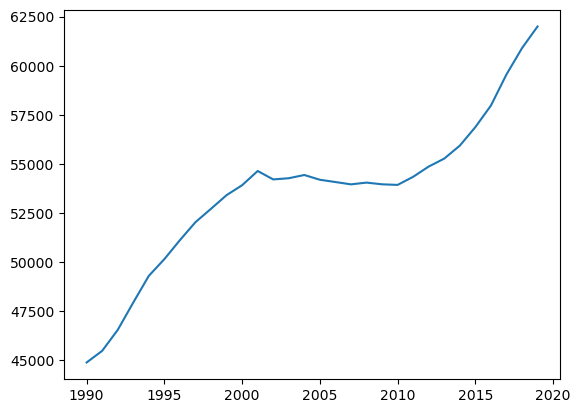

In [11]:
#graph the trend of values per continent

#start w only ony country:
afg = cvd[cvd['Country/Territory'] == 'Afghanistan']
plt.plot(afg['Year'], afg['Cardiovascular Diseases'])

Text(0, 0.5, 'Cardiovascular Diseases Cases')

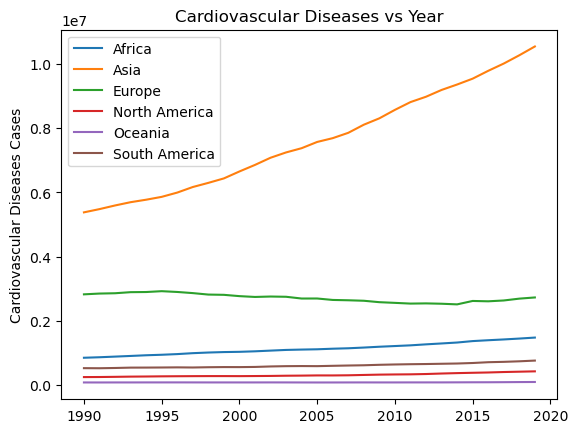

In [12]:
#repeat for all the continents 
continents = cause_death.groupby('Continent').sum()

for continent in continents.index:
    cause_continent = cause_death[cause_death['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Cardiovascular Diseases'])
    
    
plt.legend(continent_year.index)
plt.title('Cardiovascular Diseases vs Year')
plt.ylabel('Cardiovascular Diseases Cases')

In [13]:
#lets look deeper into which countries are causing this explosion of CVD cases in Asia

#query for Asia 
na_outlier = cause_death[cause_death['Continent'] == 'Asia']

#for each year get the country with highest value for CVD
na_1990 = na_outlier[na_outlier['Year'] == 1991]
na_1990 = na_1990.sort_values('Cardiovascular Diseases', ascending = False)
na_1990[['Country/Territory', 'Cardiovascular Diseases']].head()


,Country/Territory,Cardiovascular Diseases
1121,China,2456185
2437,India,1243951
2467,Indonesia,285751
2680,Japan,283890
4088,Pakistan,179306


In [14]:
#get the top countries with the highest values for every year!
asia = cause_death[cause_death['Continent'] == 'Asia']
asia = asia.sort_values('Cardiovascular Diseases', ascending = False)
india = asia[asia['Country/Territory'] == 'India']
china = asia[asia['Country/Territory'] == 'China']

#china is the highest



In [15]:
#get the top 5 countries for each year 
na_outlier = cause_death[cause_death['Continent'] == 'Asia']
year = 1990
top_countries = {}
for country in na_outlier:
    
    #for each year get the country with highest value for CVD
    na_1990 = na_outlier[na_outlier['Year'] == year]
    na_1990 = na_1990.sort_values('Cardiovascular Diseases', ascending = False)
    top_countries[year] = na_1990['Country/Territory'].head().tolist()
    #print(top_countries)
    year += 1

top_countries



{1990: ['China', 'India', 'Japan', 'Indonesia', 'Pakistan'],
 1991: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1992: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1993: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1994: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1995: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1996: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1997: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1998: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1999: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2000: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2001: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2002: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2003: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2004: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2005: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2006: ['China', 'India'

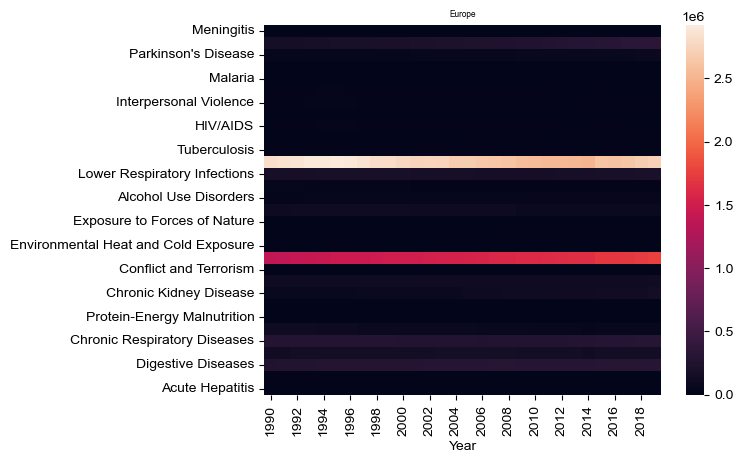

In [16]:
#create a heatmap for all the continents
def heat_map(continent):
    cont_gen = cause_death[cause_death['Continent'] == 'Europe']
    year_cont_gen = cont_gen.groupby('Year').sum()
    year_cont_gen.head()

    columns = cause_death.columns
    diseases = columns.tolist()
    diseases = diseases[2:-1]
    diseases

    color_map = cont_gen[diseases].groupby('Year').sum()
    color_map = color_map.loc[year_cont_gen.index.tolist()]
    color_map = color_map.T
    color_map

    ax = sns.heatmap(color_map)
    sns.set(font_scale=0.5)
    plt.title(continent)

    
heat_map('Europe')

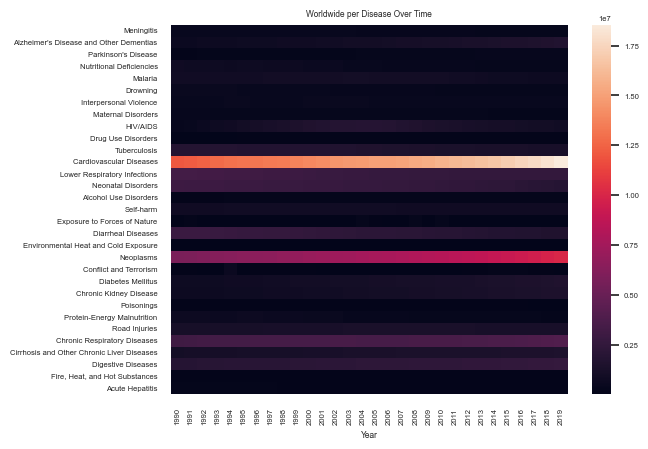

In [17]:
#heat map for all worldwide data at once 

def heat_map_all():
    year_cont_gen = cause_death.groupby('Year').sum()
    year_cont_gen
    
    columns = cause_death.columns
    diseases = columns.tolist()
    diseases = diseases[2:-1]
    diseases

    #color_map = cont_gen[diseases].groupby('Year').sum()
    #color_map = color_map.loc[year_cont_gen.index.tolist()]
    color_map = year_cont_gen.T
    color_map

    ax = sns.heatmap(color_map)
    sns.set(font_scale=0.5)
    plt.title('Worldwide per Disease Over Time')

    
heat_map_all()

In [18]:
year_cont_gen = cause_death.groupby('Year').sum()
year_cont_gen.head()

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,432253,560616,147156,756808,840297,460460,372497,302419,336059,56133,...,661085,600925,87951,655975,1112770,3092759,1012423,1854392,123123,166343
1991,428621,583166,150875,729145,858984,454375,383689,298271,430725,61890,...,679630,613589,87813,631013,1117024,3148288,1026870,1877515,123941,165276
1992,426440,605894,154886,700664,856415,447056,407176,299300,540070,66826,...,702253,630160,88435,606015,1125566,3207816,1042953,1903759,124995,163687
1993,420836,629571,160249,674219,862216,445434,432858,293564,664463,71603,...,728077,647255,90036,583919,1137444,3266612,1067730,1939556,127493,161899
1994,413799,652176,164381,649801,855671,443350,441971,293148,800169,76717,...,751254,665365,90897,564046,1153642,3297292,1089331,1967669,129611,159423


In [19]:
#trying to understand the outliers in the heatmaps 

north_america = cause_death[cause_death['Continent'] == 'North America']
year_north_america = north_america.groupby('Year').sum()
year_north_america.head()


,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,6266,18446,4292,24490,541,8859,29958,5131,7303,891,...,42043,21656,1794,21637,35252,37353,37241,64559,3459,591
1991,5951,19101,4443,24065,1785,8631,30789,4991,9669,957,...,43413,22658,1714,21318,35018,38117,38148,65676,3362,583
1992,5670,19827,4633,23438,1179,8470,31465,5185,12446,1022,...,45382,23973,1661,20774,34987,39281,39358,67288,3253,572
1993,5452,20612,4859,22759,1429,8320,31696,4764,15396,1125,...,47678,25476,1614,20143,35020,40781,40910,69258,3176,561
1994,5153,21428,5064,21791,1623,8058,32610,5012,17964,1185,...,49604,26932,1544,19286,34692,41870,41935,70419,3057,552


In [20]:
#we know that 2010, Exposures to Forces of Nature had a spike - find which country/countries were causes it:
#this was the 2010 Haiti earthquake 

#query for north america 2010
na_outlier = cause_death[cause_death['Continent'] == 'North America']
na_outlier = na_outlier[na_outlier['Year'] == 2010]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Exposure to Forces of Nature', ascending = False)

na_outlier[['Country/Territory', 'Exposure to Forces of Nature']].head()

,Country/Territory,Exposure to Forces of Nature
2330,Haiti,222641
3410,Mexico,206
2210,Guatemala,177
2360,Honduras,144
3830,Nicaragua,77


In [21]:
#we know that 1994, Conflict and Terrorism had a spike - find which country/countries were causes it:

#query for Africa 1994
na_outlier = cause_death[cause_death['Continent'] == 'Africa']
na_outlier = na_outlier[na_outlier['Year'] == 1994]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Conflict and Terrorism', ascending = False)

na_outlier[['Country/Territory', 'Conflict and Terrorism']].head()

,Country/Territory,Conflict and Terrorism
4504,Rwanda,503532
874,Burundi,12765
154,Angola,4117
3004,Liberia,3788
64,Algeria,2428


In [22]:
cause_death[cause_death['Continent'] == 'Africa'].sort_values('HIV/AIDS')['HIV/AIDS']

1170         0
4708         0
4707         0
4706         0
4705         0
         ...  
5028    282664
5024    286607
5027    298253
5025    301614
5026    305491
Name: HIV/AIDS, Length: 1500, dtype: int64

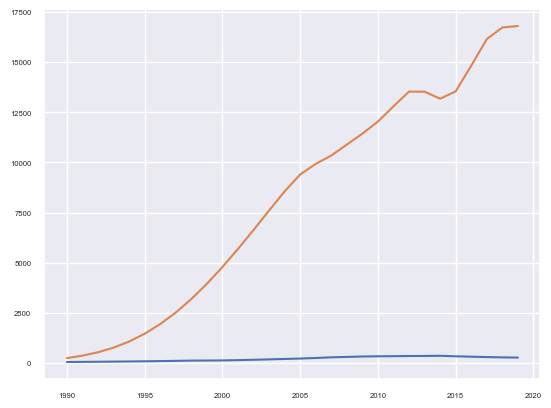

In [23]:
#since africa has a lot going on in its heat map lets do a deep dive into it
africa = cause_death[cause_death['Continent'] == 'Africa']

algeria = africa[africa['Country/Territory'] == 'Algeria']
angola = africa[africa['Country/Territory'] == 'Angola']

plt.plot(africa['Year'][:30], algeria['HIV/AIDS'])
plt.plot(africa['Year'][:30], angola['HIV/AIDS'])


Text(0.5, 1.0, 'African Countries HIV/AIDS number of deaths')

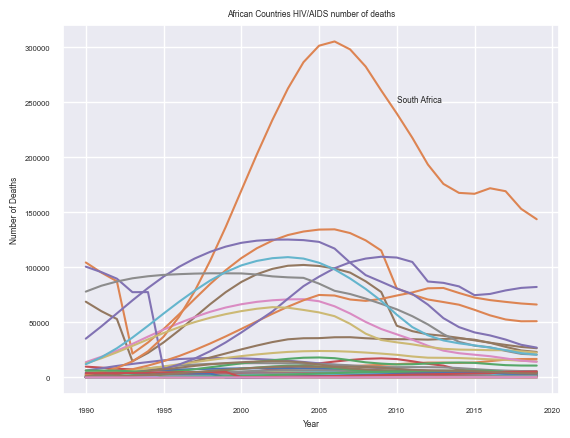

In [24]:
for country in africa['Country/Territory'].unique().tolist():
    #print(country)
    plt.plot(africa['Year'][:30], africa[africa['Country/Territory'] == country]['HIV/AIDS'])
plt.text(2010, 250000, s = 'South Africa')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('African Countries HIV/AIDS number of deaths')

In [25]:
#find the country that has huge increase and label it 

africa.sort_values('HIV/AIDS', ascending = False)[['Country/Territory', 'HIV/AIDS', 'Year']]


,Country/Territory,HIV/AIDS,Year
5026,South Africa,305491,2006
5025,South Africa,301614,2005
5027,South Africa,298253,2007
5024,South Africa,286607,2004
5028,South Africa,282664,2008
...,...,...,...
4707,Sao Tome and Principe,0,2017
4706,Sao Tome and Principe,0,2016
4705,Sao Tome and Principe,0,2015
4704,Sao Tome and Principe,0,2014
